In [0]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url_1 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text1.jpg"
url_2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text2.jpg"
url_3 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text3.jpg"
url_4 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text4.jpg"
url_5 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text5.jpg"
url_6 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text6.jpg"
urls = [url_1, url_2, url_3, url_4, url_5, url_6]

kernel = np.array([[0,1,0],
 [1,1,1],
 [0,1,0]], np.uint8)

kernel_2 = np.array([1, 1])


downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text1.jpg
185.33603880378075
171.7796854521625
162.71361607142856
151.91895604395606


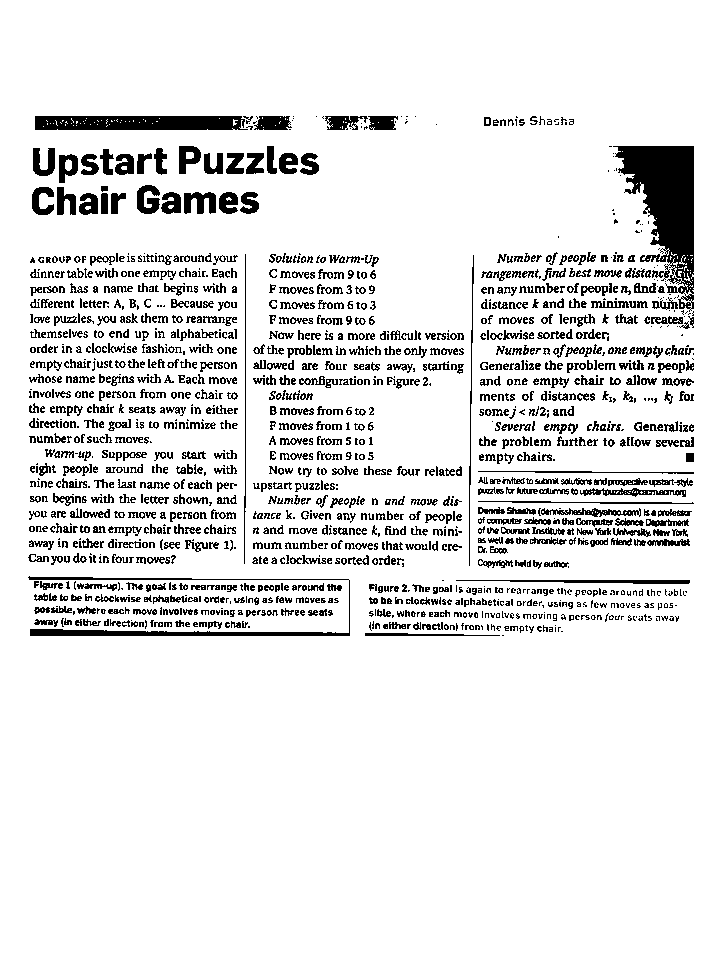

In [230]:
#image1
boxes = [(146, 580, 28, 694), (116, 130, 35, 580), (580,636,30,350), (580,636,365,690)]
img = url_to_image(url_1)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# print("image = ", grayscaled.shape)
output = np.full(grayscaled.shape, 255)

for x1, x2, y1, y2 in boxes:
  img_part = grayscaled[x1:x2, y1:y2]
#   cv2_imshow(img_part)
  print(np.mean(img_part))
  method = cv2.THRESH_BINARY_INV
  if (np.mean(img_part) > 175):
    method = cv2.THRESH_BINARY
#   thresh = cv2.adaptiveThreshold(img_part, 255,cv2.cv2.ADAPTIVE_THRESH_GAUSSIAN_C, method, 15, 5)
  retval, thresh = cv2.threshold(img_part, 170, 255, method)
#   cv2_imshow(thresh)
    
  output[x1:x2, y1:y2] = thresh

# thresh = cv2.fastNlMeansDenoising(thresh,None,80,7,15)
# grayscaled = cv2.GaussianBlur(thresh,(5,5),0)

# cv2_imshow(img_part)
cv2_imshow(output)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text3.jpg


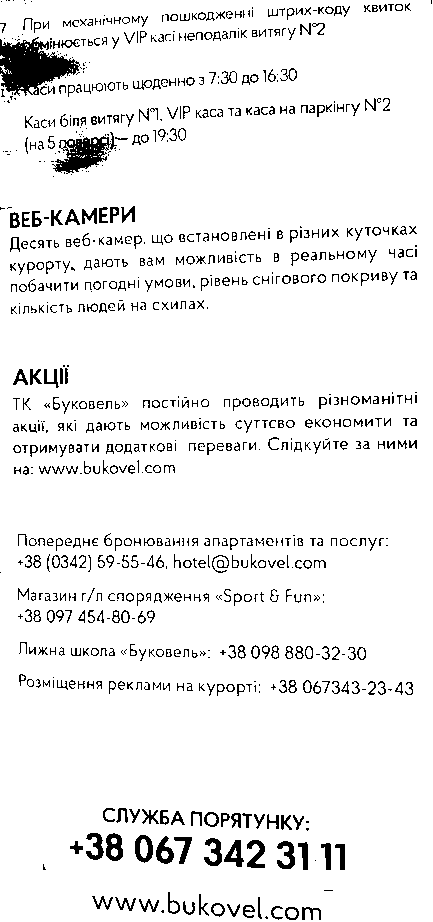

In [224]:
#image3
boxes = [(0, 712, 0, 432), (800, 870, 43, 378), (890,920,91,333)]
img = url_to_image(url_3)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# print("image = ", grayscaled.shape)
output = np.full(grayscaled.shape, 255)

for x1, x2, y1, y2 in boxes:
  img_part = grayscaled[x1:x2, y1:y2]
#   cv2_imshow(img_part)
#   print(np.mean(img_part))
  method = cv2.THRESH_BINARY_INV
  if (np.mean(img_part) > 128):
    method = cv2.THRESH_BINARY
  retval, thresh = cv2.threshold(img_part, 150, 255, method)
#   cv2_imshow(thresh)
    
  output[x1:x2, y1:y2] = thresh

# thresh = cv2.fastNlMeansDenoising(thresh,None,80,7,15)
# grayscaled = cv2.GaussianBlur(thresh,(5,5),0)

# cv2_imshow(img_part)
cv2_imshow(output)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text2.jpg
106.76135416666666
126.42815229257641
81.80445694242864
56.267279411764704
54.26259259259259


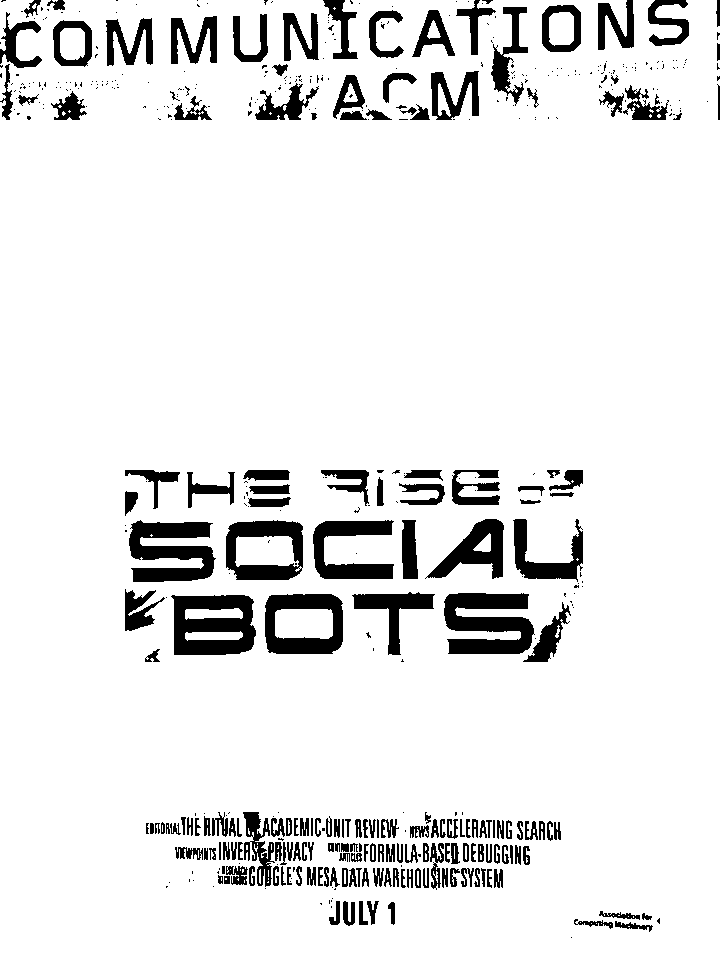

In [225]:
#image2
boxes = [(0, 120, 0, 720), (470, 662, 125, 583), (812,890,140,564), (898,930,320,405), (908,938,570,660)]
img = url_to_image(url_2)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# print("image = ", grayscaled.shape)
output = np.full(grayscaled.shape, 255)

for x1, x2, y1, y2 in boxes:
  img_part = grayscaled[x1:x2, y1:y2]
#   cv2_imshow(img_part)
  print(np.mean(img_part))
  method = cv2.THRESH_BINARY_INV
  border = 90
  dilate = False
  block_size = 51
  if (np.mean(img_part) > 100):
    method = cv2.THRESH_BINARY_INV
    dilate = True
    border = 140
    block_size = 101
    thresh = cv2.adaptiveThreshold(img_part, 255,cv2.cv2.ADAPTIVE_THRESH_MEAN_C, method, block_size, 1)
  else:
    retval, thresh = cv2.threshold(img_part, border, 255, method)
  if (dilate):
    thresh = cv2.dilate(thresh, kernel, iterations = 1)
#   thresh = cv2.erode(thresh, kernel, iterations = 3)
#   cv2_imshow(thresh)
    
  output[x1:x2, y1:y2] = thresh

# cv2_imshow(img_part)
cv2_imshow(output)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text5.jpg


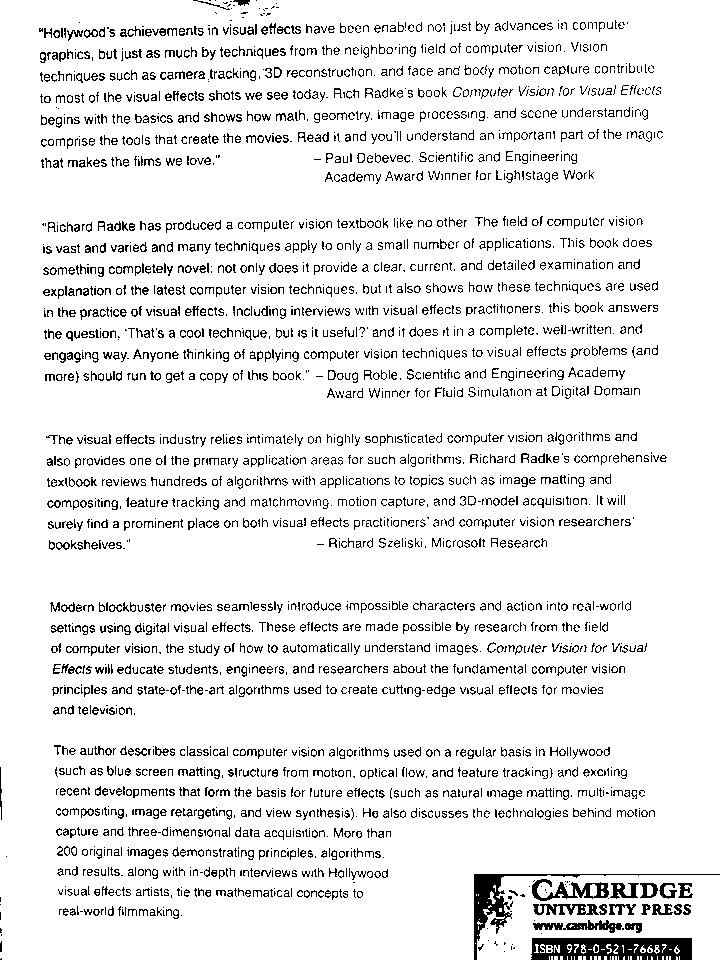

In [227]:
#image 5
img = url_to_image(url_5)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# thresh = cv2.fastNlMeansDenoising(thresh,None,80,7,15)
# thresh = cv2.GaussianBlur(thresh,(5,5),0)
retval, thresh = cv2.threshold(grayscaled, 180, 255, cv2.THRESH_BINARY_INV)
#thresh = cv2.adaptiveThreshold(grayscaled, 255,cv2.cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 10)
# thresh = cv2.bitwise_not(thresh)
# thresh = cv2.erode(thresh, kernel, iterations = 1)
# thresh_2 = cv2.erode(thresh, kernel_2, iterations = 1)
# thresh = cv2.dilate(thresh, kernel, iterations = 1)

# cv2_imshow(grayscaled)
cv2_imshow(thresh)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text6.jpg


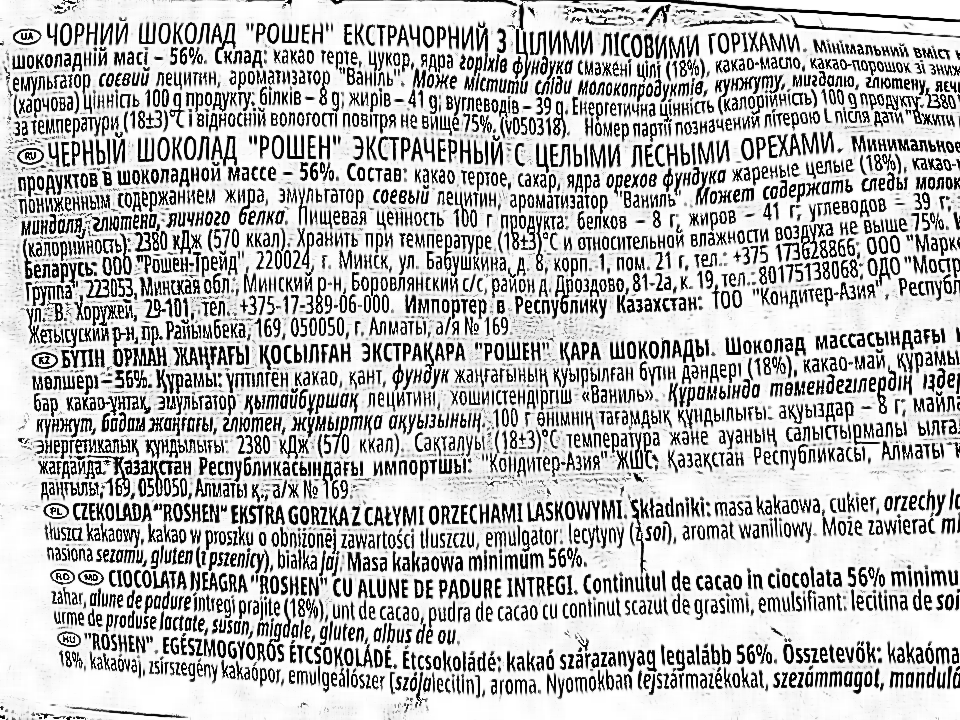

In [228]:
#image 6
img = url_to_image(url_6)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# thresh = cv2.GaussianBlur(thresh,(5,5),0)
# retval, thresh = cv2.threshold(grayscaled, 128, 255, cv2.THRESH_BINARY_INV)
grayscaled = cv2.bitwise_not(grayscaled)
thresh = cv2.adaptiveThreshold(grayscaled, 255,cv2.cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 5)
thresh = cv2.fastNlMeansDenoising(thresh,None,60,7,15)
# thresh = cv2.bitwise_not(thresh)
# thresh = cv2.erode(thresh, kernel, iterations = 1)
# thresh_2 = cv2.erode(thresh, kernel_2, iterations = 1)
# thresh = cv2.dilate(thresh, kernel, iterations = 1)

# cv2_imshow(grayscaled)
cv2_imshow(thresh)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text4.jpg


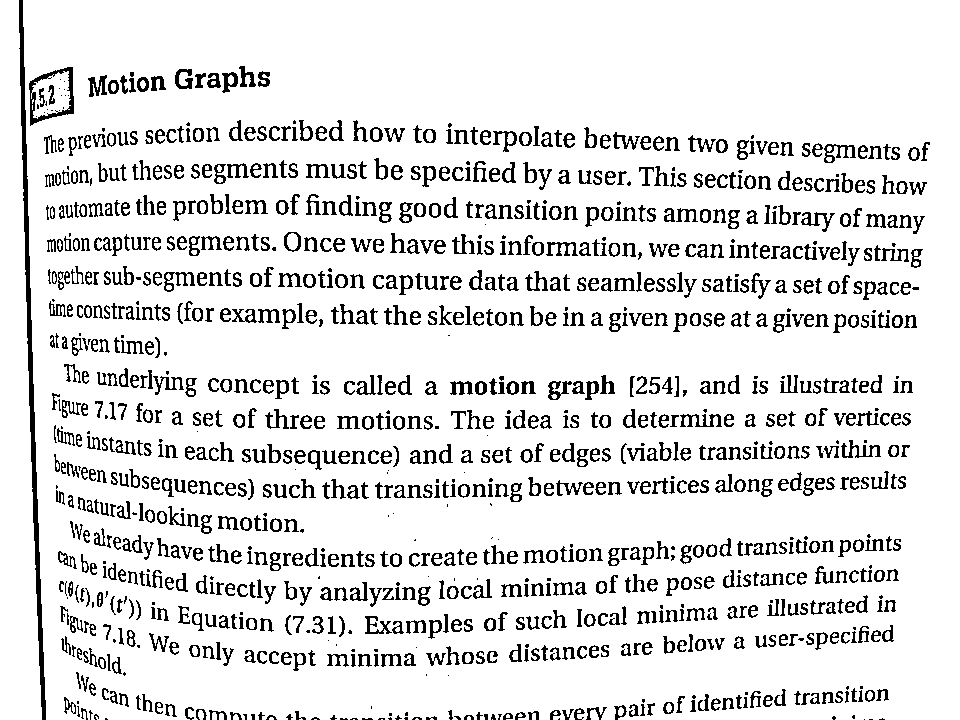

In [229]:
#image 4
img = url_to_image(url_4)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# thresh = cv2.fastNlMeansDenoising(thresh,None,80,7,15)
# thresh = cv2.GaussianBlur(thresh,(5,5),0)
thresh = cv2.adaptiveThreshold(grayscaled, 255,cv2.cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 10)
# thresh = cv2.erode(thresh, kernel, iterations = 1)
# thresh = cv2.dilate(thresh, kernel, iterations = 1)

# cv2_imshow(grayscaled)
cv2_imshow(thresh)